In [1]:
import pandas as pd
from matplotlib import pyplot
import statistics
from scipy import stats
import numpy as np
import plotly.express as px

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [2]:
import os
os.getcwd()
os.chdir(r'C:\Users\officeuser\Downloads')

In [3]:
Data = pd.read_excel ('EMB Database GEs Southern Comd.xlsx')


Data1=Data

Data = Data.drop(['ca_item_total','Ser No'],axis=1)


#target = Data['Commission']



In [4]:
Data.head()

,Date,ge,CA_No/ Tender Id,Schedule Name,caitem,ca_item_qty,acct_unit,item_rate
0,2019-12-13,GARRISON ENGINEER (SOUTH) PUNE,2019_MES_293727_1,"REPAIRS TO ROOF, ROOF LEAKAGES, FALSE CEILING,...",Taking down chowkats or frames of wooden or st...,34.0,Each,60
1,2019-12-13,GARRISON ENGINEER (SOUTH) PUNE,2019_MES_293727_1,"REPAIRS TO ROOF, ROOF LEAKAGES, FALSE CEILING,...",Taking down chowkats or frames of wooden or st...,62.0,Each,90
2,2019-12-13,GARRISON ENGINEER (SOUTH) PUNE,2019_MES_293727_1,"REPAIRS TO ROOF, ROOF LEAKAGES, FALSE CEILING,...",Taking down shutters of any description exc 1 ...,15.0,Per Leaf,36
3,2019-12-13,GARRISON ENGINEER (SOUTH) PUNE,2019_MES_293727_1,"REPAIRS TO ROOF, ROOF LEAKAGES, FALSE CEILING,...",Taking down shutters of any description exc 2...,18.0,Per Leaf,60
4,2019-12-13,GARRISON ENGINEER (SOUTH) PUNE,2019_MES_293727_1,"REPAIRS TO ROOF, ROOF LEAKAGES, FALSE CEILING,...",S&F pressed steel frames for doors with one or...,20.0,RM,390


<Figure size 1152x648 with 0 Axes>

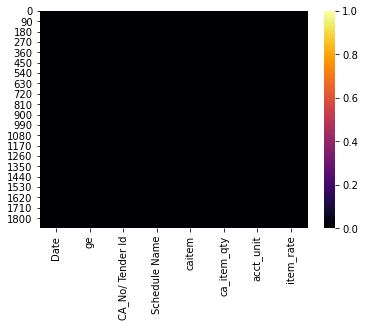

<Figure size 1152x648 with 0 Axes>

In [5]:
sns.heatmap(Data.isnull(), cmap="inferno")
plt.figure(figsize=(16,9))

In [6]:
null = Data.isnull().sum().sort_values(ascending=False)
#First sum and order all null values for each variable
percent = (Data.isnull().sum()/Data.isnull().count()).sort_values(ascending=False) 
dataType = Data.dtypes
missing_variables = pd.concat([null, percent,dataType], axis=1, keys=['Total', 'percent','Data Type'])
missing_variables = missing_variables.head(19)

In [7]:
missing_variables

,Total,percent,Data Type
acct_unit,2,0.001059,object
ca_item_qty,2,0.001059,float64
item_rate,0,0.000000,object
caitem,0,0.000000,object
Schedule Name,0,0.000000,object
CA_No/ Tender Id,0,0.000000,object
ge,0,0.000000,object
Date,0,0.000000,datetime64[ns]


In [8]:
Data['ca_item_qty'].describe()

count     1886.000000
mean       271.086007
std       2434.194463
min          0.020000
25%         10.000000
50%         30.000000
75%        100.000000
max      94800.000000
Name: ca_item_qty, dtype: float64

In [9]:
Data['item_rate'].describe()

count     1888
unique     372
top        450
freq        65
Name: item_rate, dtype: int64

In [10]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

Data['ca_item_qty'] = imp.fit_transform(Data[['ca_item_qty']]).ravel()
Data['ca_item_qty']=pd.DataFrame(Data['ca_item_qty'])

In [11]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

Data['acct_unit'] = imp.fit_transform(Data[['acct_unit']]).ravel()
Data['acct_unit']=pd.DataFrame(Data['acct_unit'])

In [12]:
Data.nunique()

Date                  27
ge                    15
CA_No/ Tender Id      32
Schedule Name         31
caitem              1876
ca_item_qty          309
acct_unit             67
item_rate            372
dtype: int64

In [13]:
#Data['item_rate'].astype(int)

In [14]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              1888 non-null   datetime64[ns]
 1   ge                1888 non-null   object        
 2   CA_No/ Tender Id  1888 non-null   object        
 3   Schedule Name     1888 non-null   object        
 4   caitem            1888 non-null   object        
 5   ca_item_qty       1888 non-null   float64       
 6   acct_unit         1888 non-null   object        
 7   item_rate         1888 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 118.1+ KB


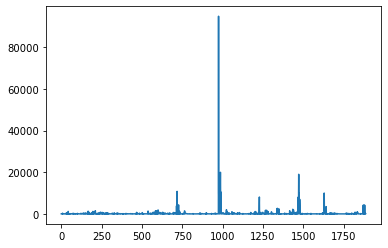

In [15]:
plt.plot(Data['ca_item_qty'])

In [16]:
Value = Data["caitem"].value_counts(sort=True).reset_index(name="count")

In [17]:

pd.set_option('display.max_rows', None)

In [18]:
Value = Value.head(300)

In [19]:
Value

,index,count
0,Supply only the following spare parts :-Bearin...,2
1,Taking down carefully all type of sub main wir...,2
2,"Dismantling, floor, hearth or wall tiling incl...",2
3,Supply and Fix in replacement CFL choke 36 wat...,2
4,Supply only the following spare parts :-Conduc...,2
5,Taking down carefully exising unserviceable al...,2
6,Supply & fix PVC connections pipe with brass h...,2
7,S&F in repairs PVC flexible three core copper ...,2
8,M&L in repairs cable PVC insulated 3 core 2.5 ...,2
9,M&L for spray painting of old surface of fan/...,2


In [20]:
Data_item = Data.groupby('caitem')

In [21]:
Data

,Date,ge,CA_No/ Tender Id,Schedule Name,caitem,ca_item_qty,acct_unit,item_rate
0,2019-12-13,GARRISON ENGINEER (SOUTH) PUNE,2019_MES_293727_1,"REPAIRS TO ROOF, ROOF LEAKAGES, FALSE CEILING,...",Taking down chowkats or frames of wooden or st...,34.00,Each,60
1,2019-12-13,GARRISON ENGINEER (SOUTH) PUNE,2019_MES_293727_1,"REPAIRS TO ROOF, ROOF LEAKAGES, FALSE CEILING,...",Taking down chowkats or frames of wooden or st...,62.00,Each,90
2,2019-12-13,GARRISON ENGINEER (SOUTH) PUNE,2019_MES_293727_1,"REPAIRS TO ROOF, ROOF LEAKAGES, FALSE CEILING,...",Taking down shutters of any description exc 1 ...,15.00,Per Leaf,36
3,2019-12-13,GARRISON ENGINEER (SOUTH) PUNE,2019_MES_293727_1,"REPAIRS TO ROOF, ROOF LEAKAGES, FALSE CEILING,...",Taking down shutters of any description exc 2...,18.00,Per Leaf,60
4,2019-12-13,GARRISON ENGINEER (SOUTH) PUNE,2019_MES_293727_1,"REPAIRS TO ROOF, ROOF LEAKAGES, FALSE CEILING,...",S&F pressed steel frames for doors with one or...,20.00,RM,390
5,2019-12-13,GARRISON ENGINEER (SOUTH) PUNE,2019_MES_293727_1,"REPAIRS TO ROOF, ROOF LEAKAGES, FALSE CEILING,...",S&F pressed steel frames for doors with one or...,20.00,RM,405
6,2019-12-13,GARRISON ENGINEER (SOUTH) PUNE,2019_MES_293727_1,"REPAIRS TO ROOF, ROOF LEAKAGES, FALSE CEILING,...",S&F IInd class hard wood 35mm thick factory ma...,15.00,Sqm,1620
7,2019-12-13,GARRISON ENGINEER (SOUTH) PUNE,2019_MES_293727_1,"REPAIRS TO ROOF, ROOF LEAKAGES, FALSE CEILING,...",S&F IInd class hard wood 35mm thick factory ma...,20.00,Sqm,1500
8,2019-12-13,GARRISON ENGINEER (SOUTH) PUNE,2019_MES_293727_1,"REPAIRS TO ROOF, ROOF LEAKAGES, FALSE CEILING,...",S&F rolled mild steel section conforming to gr...,350.00,Kg,90
9,2019-12-13,GARRISON ENGINEER (SOUTH) PUNE,2019_MES_293727_1,"REPAIRS TO ROOF, ROOF LEAKAGES, FALSE CEILING,...","S&F 30mm thick flush shutters, solid core cons...",20.00,Sqm,1440


In [22]:
DataFrame=pd.DataFrame(columns=['Date','ge','CA_No/ Tender Id','Schedule Name','caitem','ca_item_qty','acct_unit','item_rate'])

In [23]:
Data_item.head()

,Date,ge,CA_No/ Tender Id,Schedule Name,caitem,ca_item_qty,acct_unit,item_rate
0,2019-12-13,GARRISON ENGINEER (SOUTH) PUNE,2019_MES_293727_1,"REPAIRS TO ROOF, ROOF LEAKAGES, FALSE CEILING,...",Taking down chowkats or frames of wooden or st...,34.00,Each,60
1,2019-12-13,GARRISON ENGINEER (SOUTH) PUNE,2019_MES_293727_1,"REPAIRS TO ROOF, ROOF LEAKAGES, FALSE CEILING,...",Taking down chowkats or frames of wooden or st...,62.00,Each,90
2,2019-12-13,GARRISON ENGINEER (SOUTH) PUNE,2019_MES_293727_1,"REPAIRS TO ROOF, ROOF LEAKAGES, FALSE CEILING,...",Taking down shutters of any description exc 1 ...,15.00,Per Leaf,36
3,2019-12-13,GARRISON ENGINEER (SOUTH) PUNE,2019_MES_293727_1,"REPAIRS TO ROOF, ROOF LEAKAGES, FALSE CEILING,...",Taking down shutters of any description exc 2...,18.00,Per Leaf,60
4,2019-12-13,GARRISON ENGINEER (SOUTH) PUNE,2019_MES_293727_1,"REPAIRS TO ROOF, ROOF LEAKAGES, FALSE CEILING,...",S&F pressed steel frames for doors with one or...,20.00,RM,390
5,2019-12-13,GARRISON ENGINEER (SOUTH) PUNE,2019_MES_293727_1,"REPAIRS TO ROOF, ROOF LEAKAGES, FALSE CEILING,...",S&F pressed steel frames for doors with one or...,20.00,RM,405
6,2019-12-13,GARRISON ENGINEER (SOUTH) PUNE,2019_MES_293727_1,"REPAIRS TO ROOF, ROOF LEAKAGES, FALSE CEILING,...",S&F IInd class hard wood 35mm thick factory ma...,15.00,Sqm,1620
7,2019-12-13,GARRISON ENGINEER (SOUTH) PUNE,2019_MES_293727_1,"REPAIRS TO ROOF, ROOF LEAKAGES, FALSE CEILING,...",S&F IInd class hard wood 35mm thick factory ma...,20.00,Sqm,1500
8,2019-12-13,GARRISON ENGINEER (SOUTH) PUNE,2019_MES_293727_1,"REPAIRS TO ROOF, ROOF LEAKAGES, FALSE CEILING,...",S&F rolled mild steel section conforming to gr...,350.00,Kg,90
9,2019-12-13,GARRISON ENGINEER (SOUTH) PUNE,2019_MES_293727_1,"REPAIRS TO ROOF, ROOF LEAKAGES, FALSE CEILING,...","S&F 30mm thick flush shutters, solid core cons...",20.00,Sqm,1440


In [24]:
for i in Value["index"]:
    DataFrame = DataFrame.append(Data_item.get_group("{var_name}".format(var_name=i)))


In [25]:
DataFrame

,Date,ge,CA_No/ Tender Id,Schedule Name,caitem,ca_item_qty,acct_unit,item_rate
287,2020-09-04,GARRISON ENGINEER (SOUTH) PUNE,2020_MES_357044_2,"REPAIR / REPLACEMENT OF ELECTRICAL FITTING, WI...",Supply only the following spare parts :-Bearin...,200.00,Nos,65
638,2020-01-06,GARRISON ENGINEER (SOUTH) PUNE,2019_MES_298529_1,"REPAIR / REPLACEMENT OF ELECTRICAL FITTING, WI...",Supply only the following spare parts :-Bearin...,210.00,Nos,75
203,2020-09-04,GARRISON ENGINEER (SOUTH) PUNE,2020_MES_357044_2,"REPAIR / REPLACEMENT OF ELECTRICAL FITTING, WI...",Taking down carefully all type of sub main wir...,1000.00,RM,6
600,2020-01-06,GARRISON ENGINEER (SOUTH) PUNE,2019_MES_298529_1,"REPAIR / REPLACEMENT OF ELECTRICAL FITTING, WI...",Taking down carefully all type of sub main wir...,1900.00,RM,1
960,2020-01-30,GE (NW) MANKHURD,GE_MKD_40_2019_20,"REPAIRS TO ROOF, JOINERY AND CERTAIN MISC B/R ...","Dismantling, floor, hearth or wall tiling incl...",100.00,Sqm,25
1234,2019-11-20,CWE AF SECUNDERABAD,CWE AF S AFA 17 of 2019-20,PROVN OF FURNITURE FOR IT ASSETS FOR E-MMS AT ...,"Dismantling, floor, hearth or wall tiling incl...",548.00,Sqm,45
320,2020-09-04,GARRISON ENGINEER (SOUTH) PUNE,2020_MES_357044_2,"REPAIR / REPLACEMENT OF ELECTRICAL FITTING, WI...",Supply and Fix in replacement CFL choke 36 wat...,6.00,Each,180
663,2020-01-06,GARRISON ENGINEER (SOUTH) PUNE,2019_MES_298529_1,"REPAIR / REPLACEMENT OF ELECTRICAL FITTING, WI...",Supply and Fix in replacement CFL choke 36 wat...,24.00,Each,105
288,2020-09-04,GARRISON ENGINEER (SOUTH) PUNE,2020_MES_357044_2,"REPAIR / REPLACEMENT OF ELECTRICAL FITTING, WI...",Supply only the following spare parts :-Conduc...,100.00,Nos,20
639,2020-01-06,GARRISON ENGINEER (SOUTH) PUNE,2019_MES_298529_1,"REPAIR / REPLACEMENT OF ELECTRICAL FITTING, WI...",Supply only the following spare parts :-Conduc...,105.00,Nos,35


In [26]:
DataFrame.to_csv('Data Southern Comd.csv',index=False)